# Worksheet19: Classical Robot Navigation for Turtlebot3

This worksheet will take you through another important problem for a robotics designer which is Navigation. We will work with Gazebo simulator as usual and use the already-developed navigation methods for turtlebot3.   

By completing this worksheet, you will be better able to:

- **explain** the navigation process for turtlebot3 in a ROS2 environment using Gazebo
- **describe** how you can use the already developed map information to navigate
- **demonstrate** skills to use RVIZ, Gazebo environment with ROS2 for navigation

As the turtlebot3 is already installed on your VM, we straight away start with the simulation setup and then learn how to move the robot in a Gazebo environment.

**NOTE: This notebook is not an interactive one. You need to run the code in the form of scripts.**

**IMPORTANT NOTE: Please note that you will NOT and you cannot use this method in your project.**
This worksheet is meant to provide you with exposure to classical robot navigation so that you can appreciate the difference between classical and RL approaches. In your project, you will be using RL to teach the robot to navigate

## Navigation

Navigation in robotics refers to the ability of a robot to move from one location to another in its environment autonomously or semi-autonomously. It involves the use of sensors, algorithms, and decision-making processes to plan and execute paths while avoiding obstacles and reaching specified goals. 

As we are solving this navigation problem, there are several key components that plays import part to design a robust navigation algorithm.

**Perception:** Robots need sensors to perceive their surroundings. These sensors may include cameras, LiDAR (Light Detection and Ranging), ultrasonic sensors, GPS (Global Positioning System), and IMUs (Inertial Measurement Units). Perception algorithms process sensor data to generate a representation of the environment, including maps, obstacle positions, and other relevant information.

**Mapping:** Mapping involves building a representation of the robot's environment. This representation, often referred to as a map, may be static (e.g., representing obstacles and landmarks that do not change over time) or dynamic (e.g., representing moving obstacles or changes in the environment). Mapping algorithms typically use sensor data to update the map and maintain an accurate representation of the surroundings.

**Localization:** Localization is the process of determining the robot's position and orientation within the environment. This is usually done by comparing sensor data to the map generated during mapping. Localization algorithms estimate the robot's pose (position and orientation) relative to the map, allowing it to determine its current location.

**Path Planning:** Path planning involves generating a trajectory or path for the robot to follow from its current location to a specified goal while avoiding obstacles and respecting constraints such as robot dynamics, sensor limitations, and environmental constraints. Path planning algorithms take into account the map of the environment, the robot's current pose, and the desired goal to compute a safe and efficient path.

**Control:** Control algorithms translate the planned path into commands that drive the robot's actuators (e.g., motors or steering systems) to follow the desired trajectory accurately. Control algorithms typically take into account feedback from sensors to adjust the robot's motion in real-time and compensate for errors or disturbances.

For this purpose, a map that contains geometry information of furniture, objects, and walls of the given environment is required. We will be using the map we created in our previous worksheet in this example. 

Lets start the simulation process by launching the turtlebot3 in gazebo environment. Open a new terminal and source the workspace. Then, use the following command to select the model of the turtlebot3

In [ ]:
export TURTLEBOT3_MODEL=burger

Launch the robot in the gazebo environment by using the following command

In [ ]:
ros2 launch turtlebot3_gazebo turtlebot3_world.launch.py

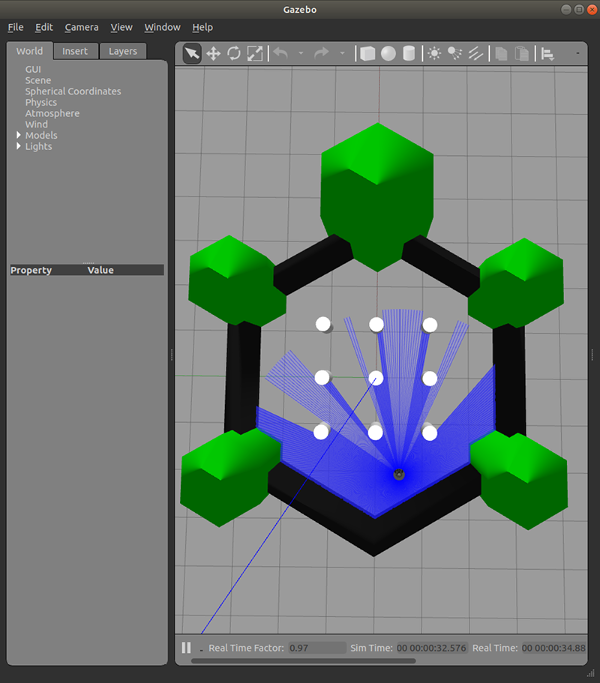

In [ ]:
Now, open another terminal and source it. Select the turtlebot3 model by using the command

In [ ]:
export TURTLEBOT3_MODEL=burger

Once, the selection is done, now use the following command to launch the navigation node.  

In [ ]:
ros2 launch turtlebot3_navigation2 navigation2.launch.py use_sim_time:=True map:=$HOME/map.yaml

The map developed in our previous worksheet is added with the navigation node launch. It will again open a RViz window. Now, we need to estimate the initial pose of our robot.

### Estimate the Initial pose

Initial Pose Estimation must be performed before running the Navigation as this process initializes the AMCL parameters that are critical in Navigation. TurtleBot3 has to be correctly located on the map with the LDS sensor data that neatly overlaps the displayed map.

The process to select the initial pose on the rviz is given below

1. Click the ```2D Pose Estimate``` button in the RViz2 menu.
2. Click on the map where the actual robot is located and drag the large green arrow toward the direction where the robot is facing.
3. Repeat step 1 and 2 until the LDS sensor data is overlayed on the saved map.

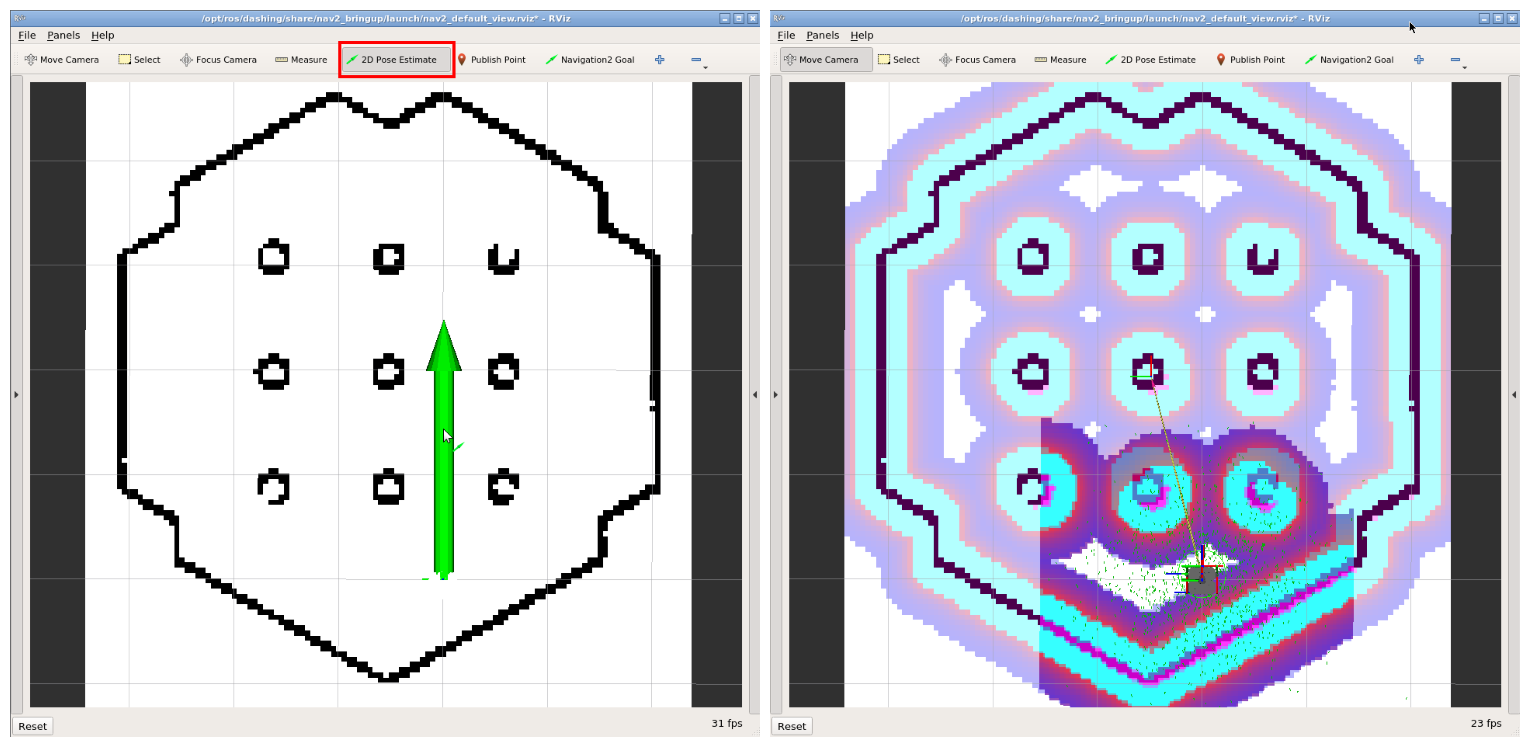

The rviz snapshot shows us the direction of the robot possible movement. If you are not yet sure about the location of the robot in the map, launch the keyboard releoperation node and precisely locate the robot on the map. You can open another terminal and source it.

Then, you need to select the model of the turtlebot3

In [ ]:
export TURTLEBOT3_MODEL=burger

Now, run the teleop keyboard operation node

In [ ]:
 ros2 run turtlebot3_teleop teleop_keyboard

Move the robot back and forth a bit to collect the surrounding environment information and narrow down the estimated location of the TurtleBot3 on the map which is displayed with tiny green arrows.

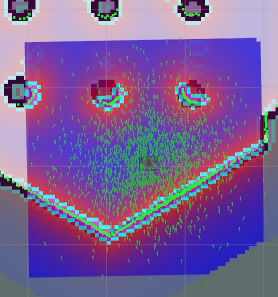

We can see in the above figure that, the estimate of the robot position is all over the place (green dots). But as you move the robot and a better estimate is obtained, the robot position is more properly estimated now. See the picture below.

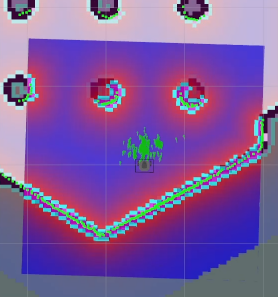

Once, this is done, terminate the keyboard teleoperation node by entering ```Ctrl + C``` to the teleop node terminal in order to prevent different cmd_vel values are published from multiple nodes during Navigation.

Once, the initial pose location is achieved, now we have to tell the robot final goal position and robot will find a way using path planning algorithm and move to that goal position in a fully controlled manner. 

### Set the Navigation Goal

Start setting the navigation goal,

1. Click the ```Navigation2 Goal``` button in the RViz2 menu.
2. Click on the map to set the destination of the robot and drag the green arrow toward the direction where the robot will be facing.
    a. This green arrow is a marker that can specify the destination of the robot.
    b. The root of the arrow is x, y coordinate of the destination, and the angle θ is determined by the orientation of the arrow
    c. As soon as x, y, θ are set, TurtleBot3 will start moving to the destination immediately.

We can see the response in figure below

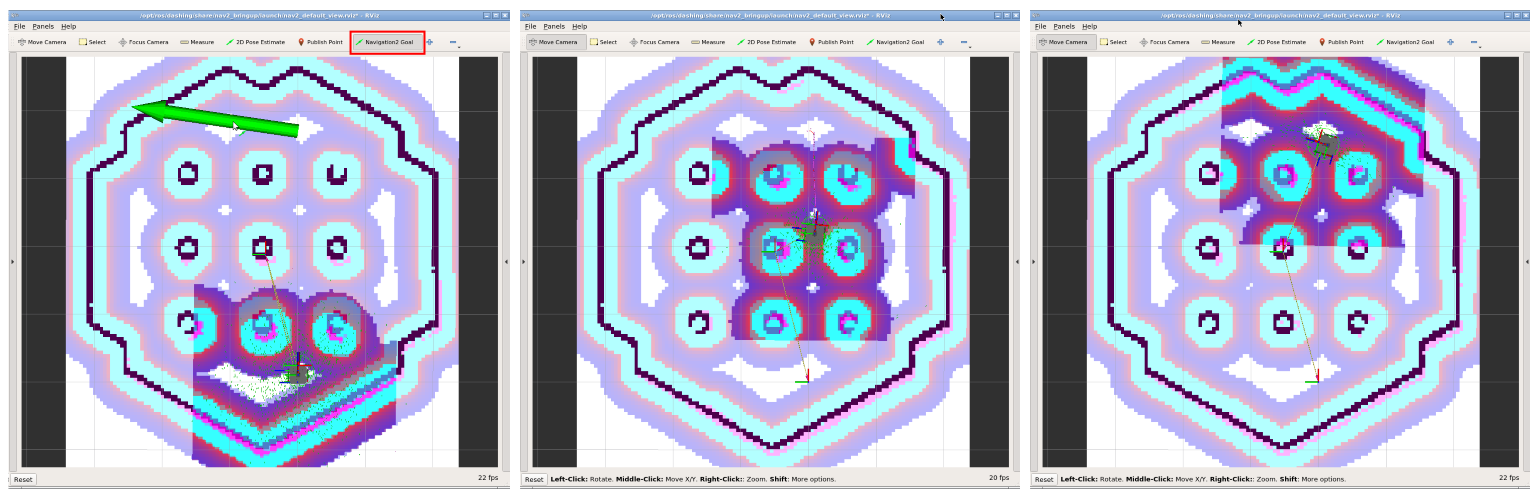


## Summary:

The task is completed. We have used the map, we have built in our previous worksheet exercise and then use the navigation node for turtlebot3, we asked the robot to start from some initial position in the map and reach the final position. 